[Original source](https://www.kaggle.com/clean_dfsets/vijayadityads/income-evaluation)
* `age`: continuous.

* `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-
pay, Never-worked.

* `fnlwgt`: final weight - number of people in the population that the surveyed individual or household represents.  continuous.

* `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-
8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* `education-num`: continuous.

* `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-
spouse-absent, Married-AF-spouse.

* `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty,Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-
serv, Protective-serv, Armed-Forces.

* `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* `sex`: Female, Male.
* `capital-gain`: continuous.
* `capital-loss`: continuous.
* `hours-per-week`: continuous.

* `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-
US(Guam-USVI-etc.), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador,
Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad & Tobago, Peru, Hong, Holland-Netherlands.

### TASK
* ####  This clean_dfset contains information of customers in bank, where you are working as clean_df Scientist. Through given variables you should predict whether a person makes less than 50K $ in a year.
Note: You should not use all variables. Define which parameters will be useful for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

from warnings import filterwarnings
filterwarnings('ignore')

# Plan
* Familiarization with clean_df
    * Check clean_df types
    * Check column and row sizes
    * Check null and duplicate counts
    * Identify outliers
    * Analyze correlations
    * Create visualizations for (almost) every column
* Cleaning
    * Drop useless columns
    * Rename column headers
    * Reduce some categories
    * Remove outliers
    * Apply frequency encoding
* Preprocessing
* Machine Learning


# Step 1. Familiarization with data

We load the dataset and perform initial exploration to understand the structure and content of the data.

In [2]:
df = pd.read_excel("income_evaluation.xlsx")
clean_df = df.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We see a whitespace in all headers expect `age`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see a large range in `capital-gain` and `fnlwgt`

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
df.shape

(32561, 15)

In cleaning step, we will drop this duplicated

In [6]:
df.duplicated().sum()

np.int64(24)

In [7]:
df.isna().sum().sum()

np.int64(0)

In `fnlwgt` and `capital-gain` we can see a massive outlier. Let's see them individually

<Axes: >

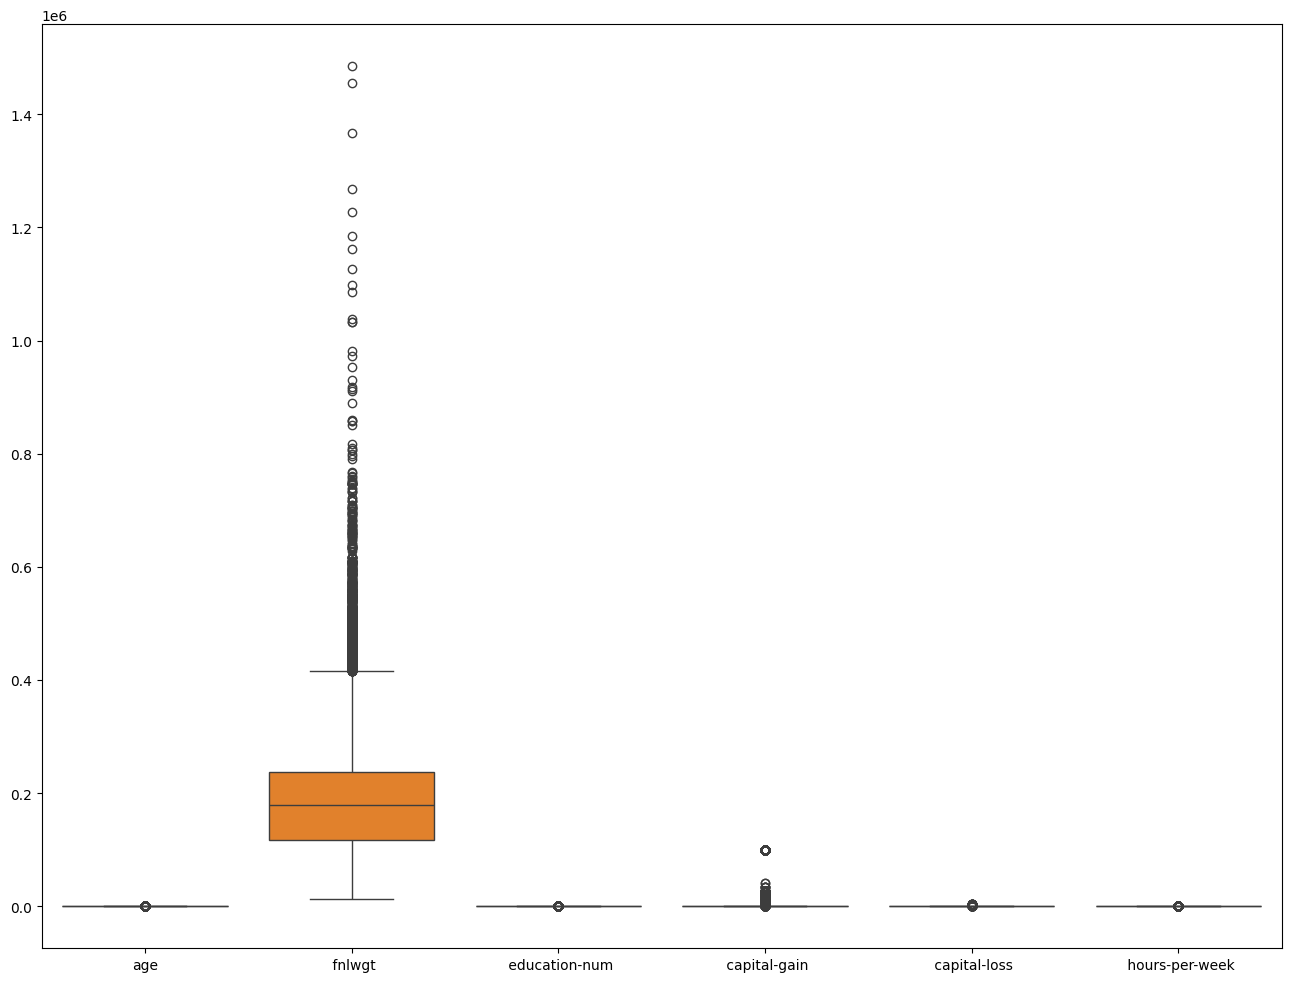

In [8]:
plt.figure(figsize=(16,12))
sns.boxplot(df)

Text(0.5, 1.0, 'Capital loss')

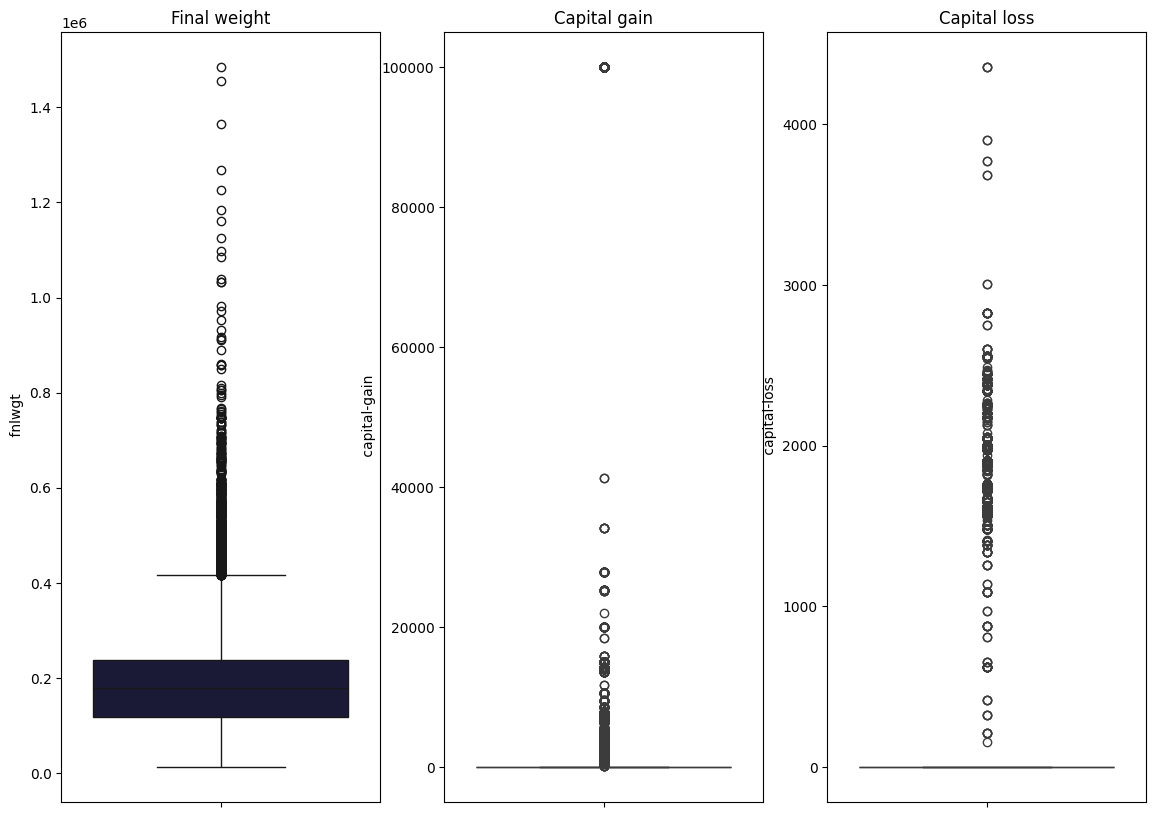

In [9]:
figure, axis = plt.subplots(1, 3,figsize=(14,10)) 

sns.boxplot(df[" fnlwgt"],ax=axis[0],color="#17153B")
axis[0].set_title('Final weight')

sns.boxplot(df[" capital-gain"],ax=axis[1],color="#433D8B")
axis[1].set_title('Capital gain')

sns.boxplot(df[" capital-loss"],ax=axis[2],color="#433D8B")
axis[2].set_title('Capital loss')

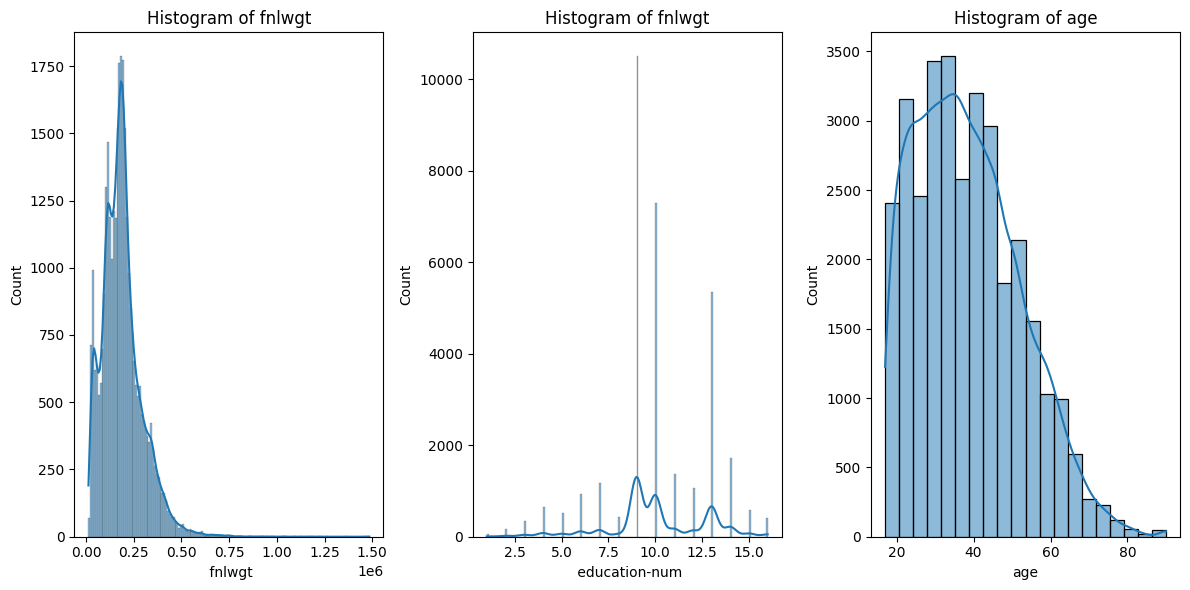

In [10]:
figure, axis = plt.subplots(1, 3, figsize=(12, 6))

sns.histplot(df[" fnlwgt"], bins=150, kde=True, ax=axis[0])
axis[0].set_title('Histogram of fnlwgt')

sns.histplot(df[" education-num"], bins=150, kde=True, ax=axis[1])
axis[1].set_title('Histogram of fnlwgt')

sns.histplot(df["age"], bins=20, kde=True, ax=axis[2])
axis[2].set_title('Histogram of age')

plt.tight_layout()
plt.show()

`Capital gain` and `Capital loss` is Left Skew

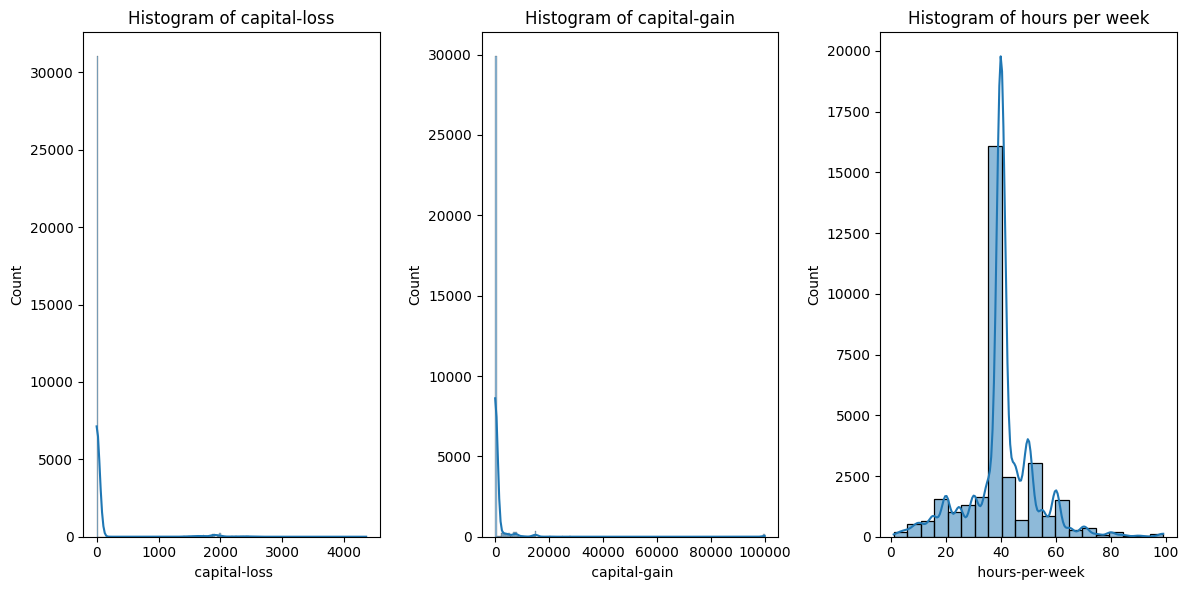

In [11]:
figure, axis = plt.subplots(1, 3, figsize=(12, 6))

sns.histplot(df[" capital-loss"], bins=150, kde=True, ax=axis[0])
axis[0].set_title('Histogram of capital-loss')

sns.histplot(df[" capital-gain"], bins=150, kde=True, ax=axis[1])
axis[1].set_title('Histogram of capital-gain')

sns.histplot(df[" hours-per-week"], bins=20, kde=True, ax=axis[2])
axis[2].set_title('Histogram of hours per week')

plt.tight_layout()
plt.show()

#### All correlation is to small
#### Target(income) is object, so we can't see corr between `income` and other features, so let's check corr after cleaning again

<Axes: >

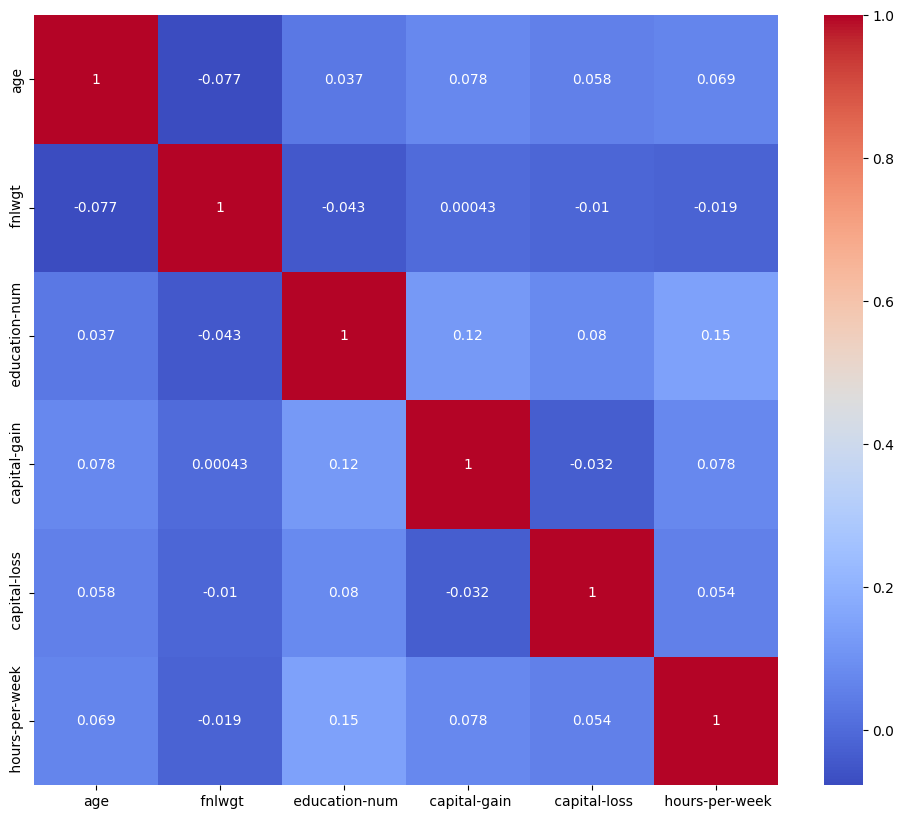

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True,cmap="coolwarm")

## Ckecking all object type columns

In [13]:
df.select_dtypes("object").columns

Index([' workclass', ' education', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' native-country', ' income'],
      dtype='object')

In number types, we have `education-num`. This is `education` label encoding variant, so we can drop education(in cleaning step)

In [14]:
def barplot(col_name,rotation=0,width=18):
    plt.figure(figsize=(width,8))
    sns.barplot( df[col_name].value_counts(),palette="pastel")
    plt.xticks(rotation=rotation)
    plt.show()

In [15]:
def more_than_one_bar(col_name1, col_name2):
    figure, axis = plt.subplots(1, 2, figsize=(18, 8))
    sns.barplot( df[col_name1].value_counts(),ax=axis[0],palette="pastel")
    axis[0].set_title(col_name1.strip())

    sns.barplot( df[col_name2].value_counts(),ax=axis[1],palette="pastel")
    axis[1].set_title(col_name2.strip())

    axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=75)
    axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=75)

    plt.show()

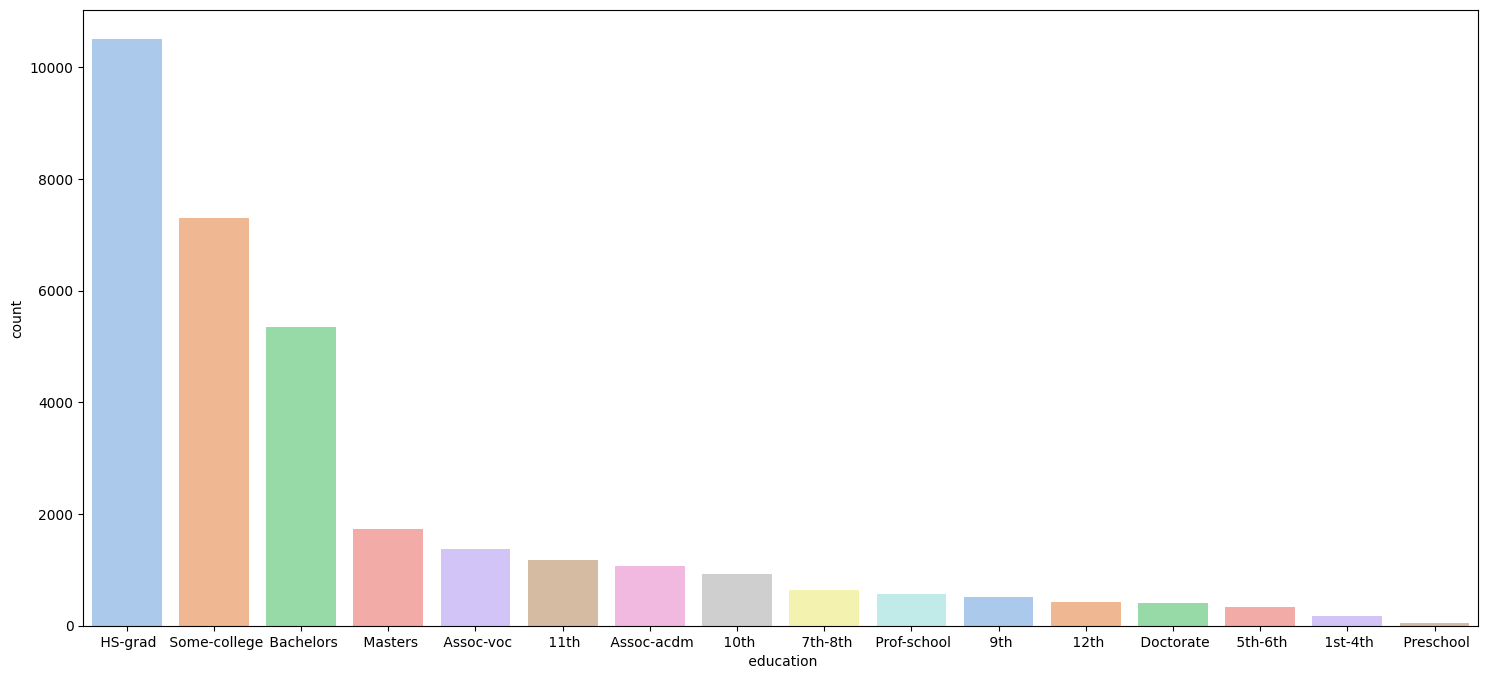

In [16]:
barplot(" education")


* #### We see that `marital-status` and `relationship` describe almost the same thing.
* #### `martial-status` just is more detail(like `maried-civ` and `married-af spouse`)
* #### In `relationship` we can combine `Wife` and `Husband` in `Married` category

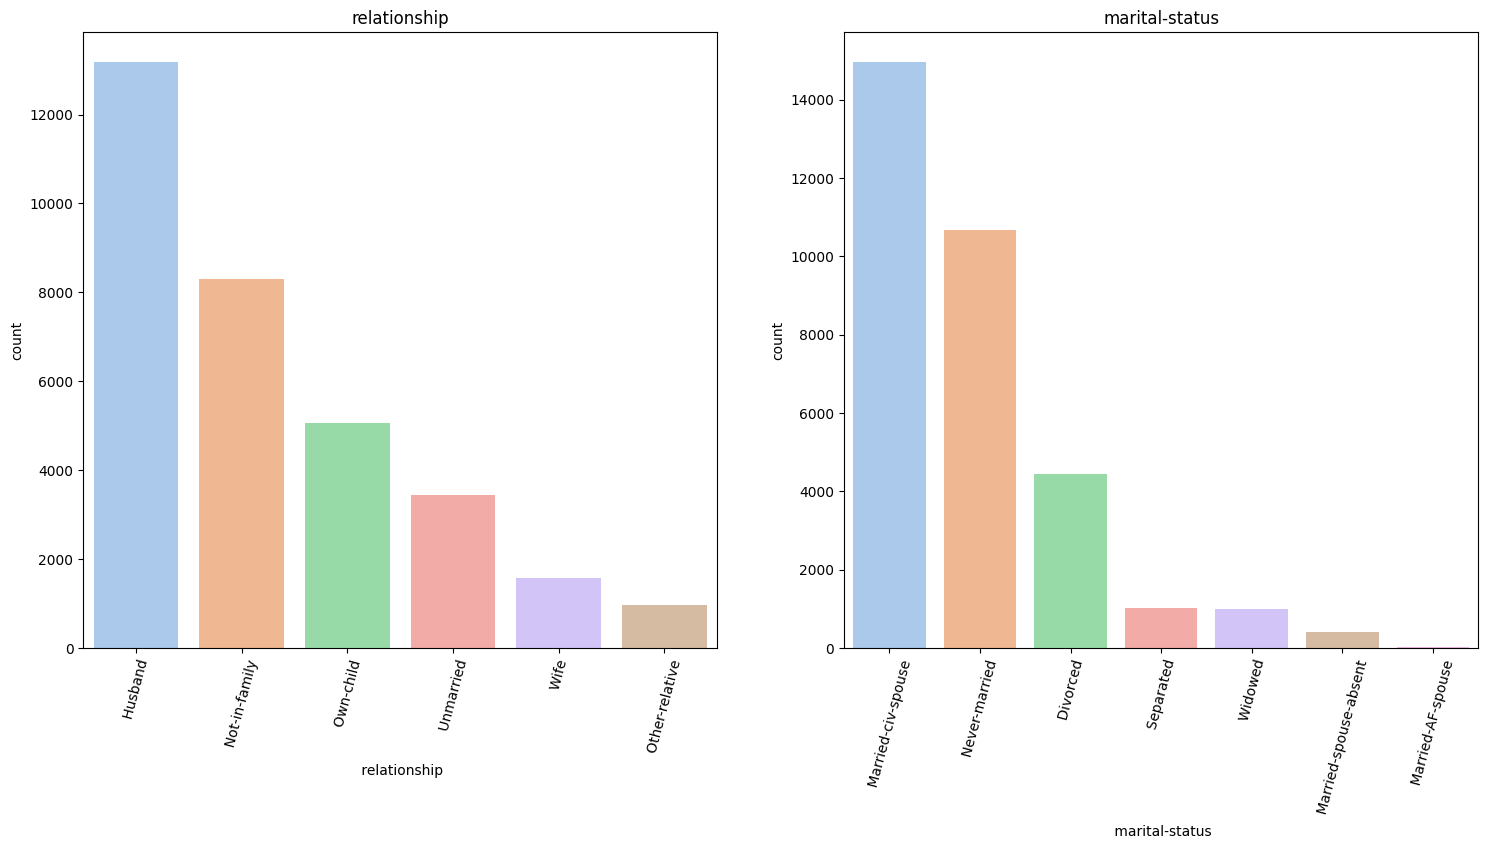

In [17]:
more_than_one_bar(" relationship"," marital-status")

We see a `?` in both, in cleaning step we need replace `?`. 
`occupation` is more abstract than `workclass`, so we left only workclass

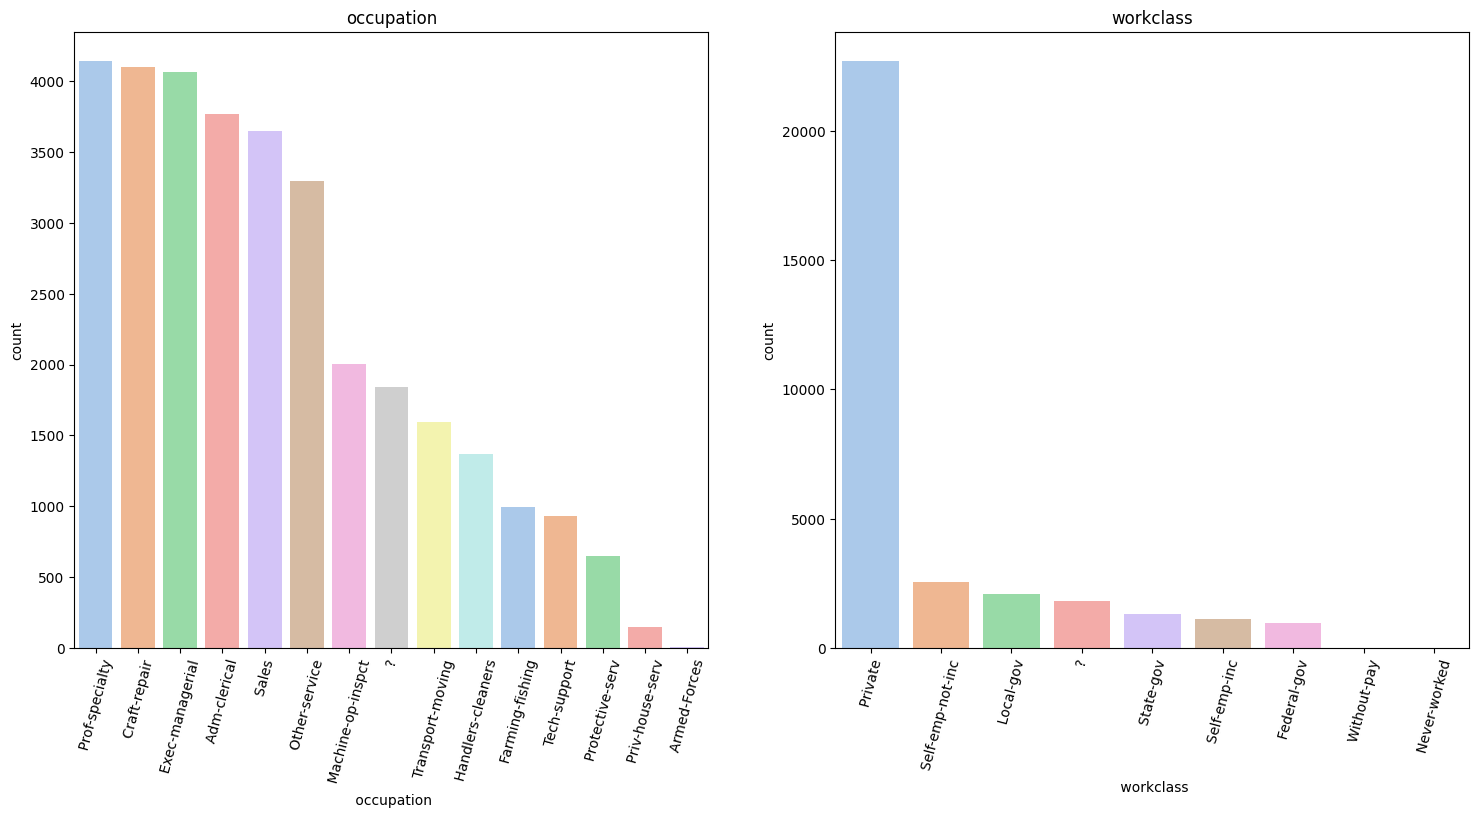

In [18]:
more_than_one_bar(" occupation"," workclass")

`?` again. And also wee see 42 country, this is too much for `one hot encoding', so have 3 choice
1. frequency encoding
2. target encoding
3. separate to continent 
#### I choice frequency encoding

Country count: 42 



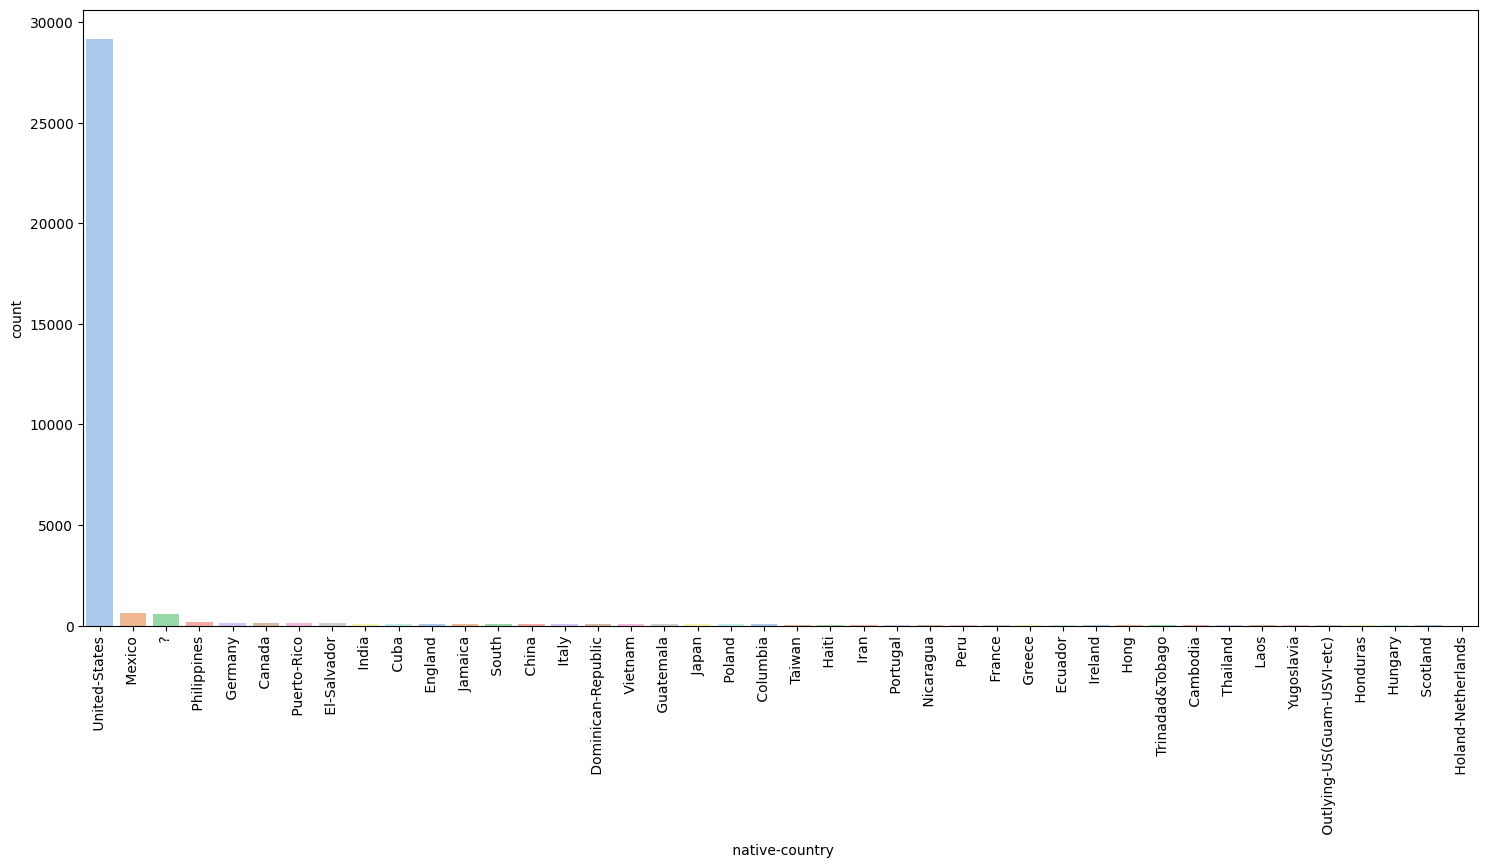

In [19]:
print(f"Country count: {df[" native-country"].nunique()}","\n")
barplot(" native-country",90)

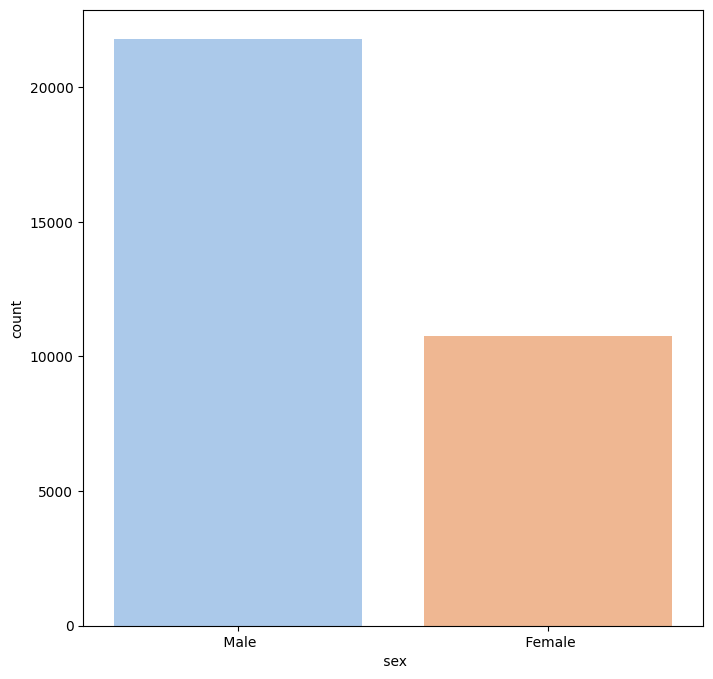

In [20]:
barplot(col_name=" sex",width=8)

`Amer-Indian-Eskimo` and `Asian-Pac-Islander` is too specific race, we can add this 2 race to `Other`

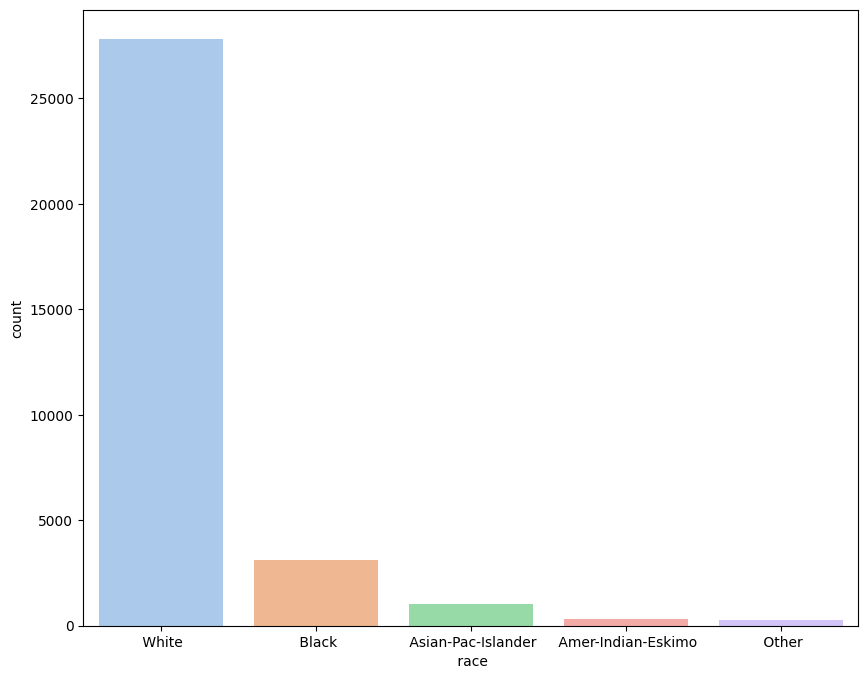

In [21]:
barplot(col_name=" race",width=10)

### Our target(Y). 
Impalanced clean_df. We can use `over sampling`, `under sampling`, `smoteen`(oversample and undersample combine)

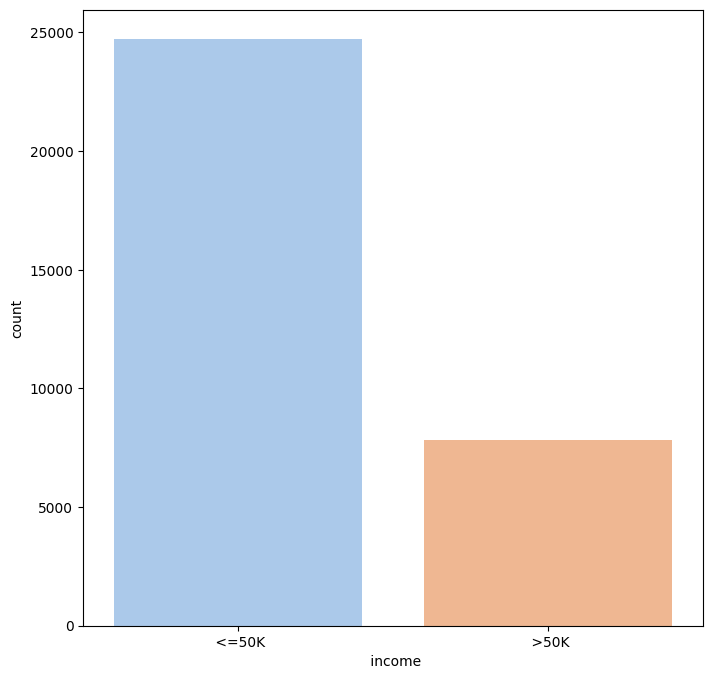

In [22]:
barplot(col_name=" income",width=8)

### In result
* #### delete all whitespace in headers  and replace '-' to '_'
* #### drop duplicated
* #### drop fnlwgt, occupation,education, marital-status
* #### replaced all '?' in `workclass` and `native-country`
* #### replace some category in object columns to `Other` and reduce the amount of category
* #### clip `capital gain`  outliers
* #### frequency encoding

# Step 2. Cleaning
In this section, we handle missing values and perform necessary transformations to prepare the data for analysis and modeling.

### 1.Delete all whitespaces and replace `-` to `_`

In [23]:
clean_df.rename(columns=lambda x: x.strip(), inplace=True)
clean_df.columns = clean_df.columns.str.replace("-","_")

### 2.Drop duplicated

In [24]:
print(f"Shape before drop duplicated - {clean_df.shape}"
      f"\nDuplicated count before drop - {clean_df.duplicated().sum()}")

clean_df.drop_duplicates(inplace=True)

print(f"\nDuplicated after their drop - {clean_df.duplicated().sum()}",
      f"\nShape after drop duplicated - {clean_df.shape}")

Shape before drop duplicated - (32561, 15)
Duplicated count before drop - 24

Duplicated after their drop - 0 
Shape after drop duplicated - (32537, 15)


### 3.Drop columns

In [25]:
clean_df.drop(["education", "fnlwgt", "occupation","marital_status"],axis=1,inplace=True)
clean_df.columns

Index(['age', 'workclass', 'education_num', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### 4.Delete all white space in all object rows and make all columns name `titled`

In [26]:
for obj_col in clean_df.select_dtypes(include="object").columns:
    clean_df[obj_col] = clean_df[obj_col].str.title().str.strip()
    
clean_df.columns = clean_df.columns.str.title().str.strip()

### 5.Replace all `?`  to mode in their columns

In [27]:
def replace_questionmark(col_name):
    col_mode =  clean_df[col_name].mode()[0]
    clean_df[col_name] = clean_df[col_name].replace({"?": col_mode})
    print(clean_df[col_name].value_counts())

replace_questionmark("Native_Country")

Native_Country
United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [28]:
replace_questionmark("Workclass")

Workclass
Private             24509
Self-Emp-Not-Inc     2540
Local-Gov            2093
State-Gov            1298
Self-Emp-Inc         1116
Federal-Gov           960
Without-Pay            14
Never-Worked            7
Name: count, dtype: int64


### 6.Replace some category in object columns to `Other` and reduce the amount of category


In [29]:
def replace_and_reduce(replace_dict,col_name):
    clean_df[col_name] = clean_df[col_name].replace(replace_dict)
    print(clean_df[col_name].value_counts())

In [30]:
replace={"Never-Worked":"Other",
         "Without-Pay":"Other", 
         "Self-Emp-Not-Inc":"Self-Emp-Inc",
         "Local-Gov":"Government",
         "State-Gov":"Government",
         "Federal-Gov":"Government"
        }

replace_and_reduce(replace,"Workclass")

Workclass
Private         24509
Government       4351
Self-Emp-Inc     3656
Other              21
Name: count, dtype: int64


In [31]:
replace = {"Wife":"Married","Husband":"Married"}
replace_and_reduce(replace,"Relationship")

Relationship
Married           14755
Not-In-Family      8292
Own-Child          5064
Unmarried          3445
Other-Relative      981
Name: count, dtype: int64


In [32]:
clean_df.Race.value_counts()
replace = {"Asian-Pac-Islander":"Other","Amer-Indian-Eskimo":"Other"}
replace_and_reduce(replace,"Race")

Race
White    27795
Black     3122
Other     1620
Name: count, dtype: int64


In [33]:
replace = {"<=50K":0,">50K":1}
replace_and_reduce(replace,"Income")

Income
0    24698
1     7839
Name: count, dtype: int64


In [34]:
replace = {"Male":0,"Female":1}
replace_and_reduce(replace,"Sex")

Sex
0    21775
1    10762
Name: count, dtype: int64


### 7.Clip outliers in capital-gain and loss

In [35]:
print(f"""Max Capital gain with outlier: {max(clean_df["Capital_Gain"])}
Max Capital loss without outlier: {max(clean_df["Capital_Loss"])}""")   

Max Capital gain with outlier: 99999
Max Capital loss without outlier: 4356


In [36]:
def clip_outliers(col_name):
    q1 = clean_df[col_name].quantile(0.25)
    q3 = clean_df[col_name].quantile(1)  

    iqr = q3 - q1

    upper_bound = min(q3, 65000)  
    lower_bound = q1 - (1.5 * iqr)
    
    return clean_df[col_name].clip(lower=lower_bound, upper=upper_bound)


In [37]:
print(f"""Max Capital gain without outlier: {max(clip_outliers("Capital_Gain"))}
        \nMax Capital loss without outlier: {max(clip_outliers("Capital_Loss"))}""")   

Max Capital gain without outlier: 65000
        
Max Capital loss without outlier: 4356


In [38]:
clean_df["Capital_Loss"] = clip_outliers("Capital_Loss")
clean_df["Capital_Gain"] = clip_outliers("Capital_Gain")

### Let's check heatmap and histogram again

### Before change the countries, let's check sum capital gain in countries
* As expected, USA is in first place by a wide margin
* In the second place - India, because of number of population


In [39]:
clean_df.groupby(by="Native_Country")["Capital_Gain"].sum().sort_values(ascending=False)

Native_Country
United-States                 27611186
India                           255495
Mexico                          188140
Philippines                     166633
Canada                          147001
Japan                           122867
Germany                         121532
South                           114580
Iran                             87920
England                          77825
Taiwan                           74500
Dominican-Republic               68325
El-Salvador                      60878
Italy                            44640
Vietnam                          44260
Poland                           41057
Jamaica                          38486
Greece                           37233
Puerto-Rico                      36160
Cuba                             34887
China                            27486
Cambodia                         19529
France                           15864
Guatemala                        14773
Ecuador                          14773
Columbia  

## Save this version for Tableau visualization

In [40]:
df_for_excel = deepcopy(clean_df)

df_for_excel["Education"] = df[" education"].str.strip()
df_for_excel.drop("Education_Num",axis=1,inplace=True)

df_for_excel.to_excel("Clean_Income.xlsx")
df_for_excel.head()

,Age,Workclass,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income,Education
0,39,Government,Not-In-Family,White,0,2174,0,40,United-States,0,Bachelors
1,50,Self-Emp-Inc,Married,White,0,0,0,13,United-States,0,Bachelors
2,38,Private,Not-In-Family,White,0,0,0,40,United-States,0,HS-grad
3,53,Private,Married,Black,0,0,0,40,United-States,0,11th
4,28,Private,Married,Black,1,0,0,40,Cuba,0,Bachelors


In [41]:
frequency_encoding = clean_df['Native_Country'].value_counts(normalize=True)
frequency_mapp = clean_df['Native_Country'].map(frequency_encoding)

print(f"""Original clean_df : {clean_df['Native_Country'].value_counts().head()}
         \nFrequency Encoding \n{frequency_mapp.value_counts().head()}""")

Original clean_df : Native_Country
United-States    29735
Mexico             639
Philippines        198
Germany            137
Canada             121
Name: count, dtype: int64
         
Frequency Encoding 
Native_Country
0.913883    29735
0.019639      639
0.006085      198
0.004211      137
0.001906      124
Name: count, dtype: int64


In [42]:
clean_df['Native_Country'] = frequency_mapp
clean_df['Native_Country'].value_counts().head()

Native_Country
0.913883    29735
0.019639      639
0.006085      198
0.004211      137
0.001906      124
Name: count, dtype: int64

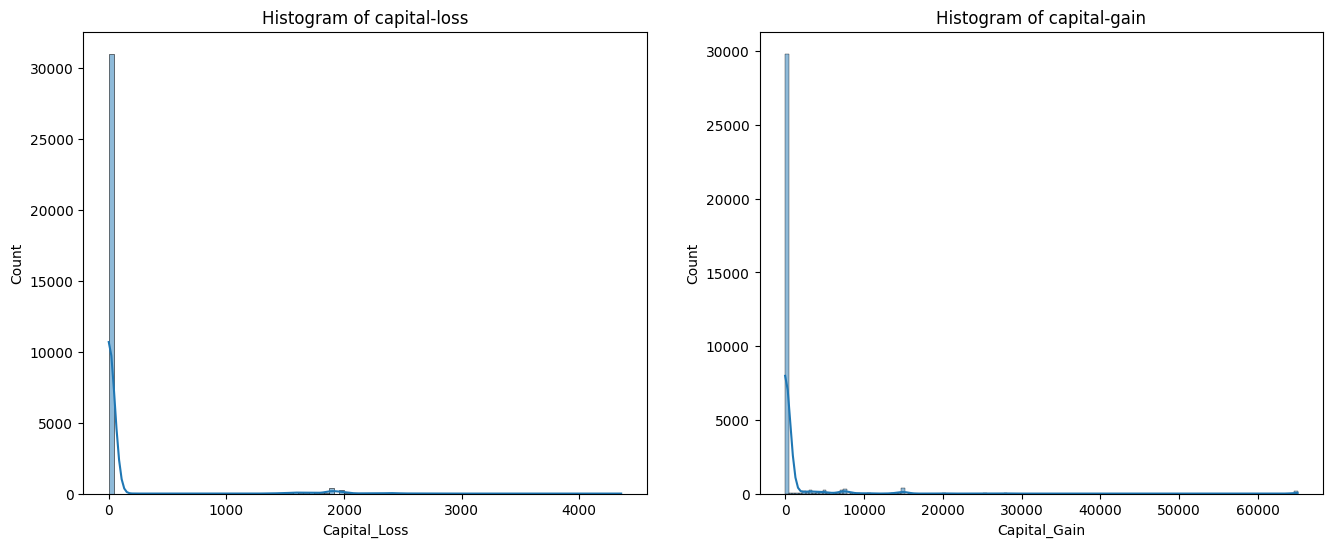

In [43]:
figure, axis = plt.subplots(1, 2,figsize=(16,6)) 

sns.histplot(clean_df["Capital_Loss"], bins=100, kde=True, ax=axis[0])
axis[0].set_title('Histogram of capital-loss')

sns.histplot(clean_df["Capital_Gain"], bins=150, kde=True, ax=axis[1])
axis[1].set_title('Histogram of capital-gain')
plt.show()

We never can remove all outliers, but 65k is more undersandble than 100k in `capital gain`

Text(0.5, 1.0, 'Capital loss')

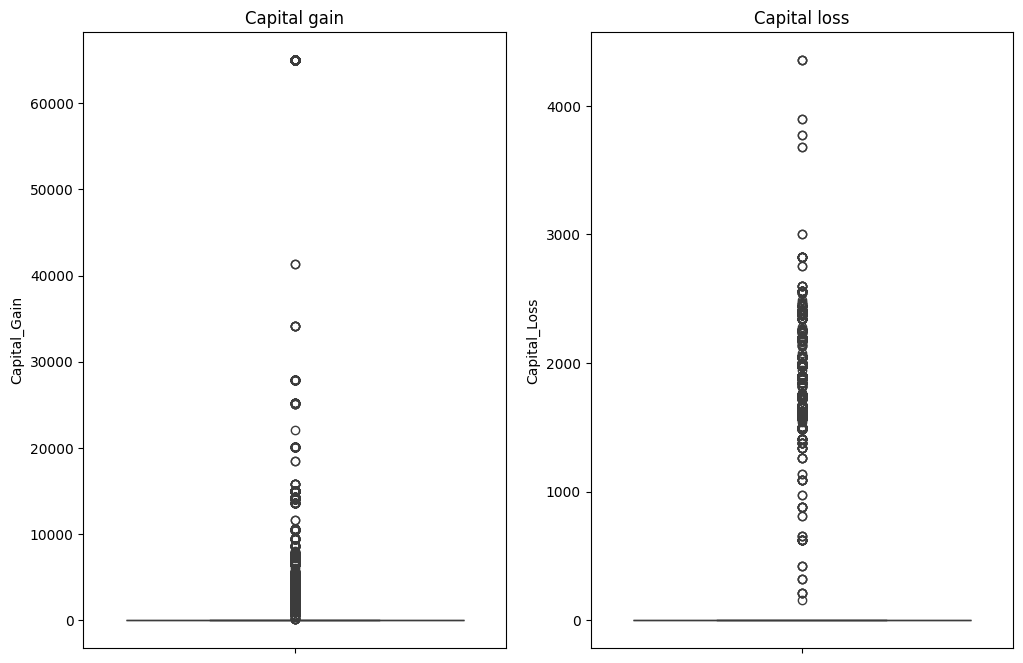

In [44]:
figure, axis = plt.subplots(1, 2,figsize=(12,8)) 

sns.boxplot(clean_df["Capital_Gain"],ax=axis[0],color="#433D8B")
axis[0].set_title('Capital gain')

sns.boxplot(clean_df["Capital_Loss"],ax=axis[1],color="#433D8B")
axis[1].set_title('Capital loss')

Max income in self-emp-inc

In [45]:
clean_df.groupby(by="Workclass")["Income"].mean()

Workclass
Government      0.308205
Other           0.000000
Private         0.210208
Self-Emp-Inc    0.368162
Name: Income, dtype: float64

Max income in married couples. Commnly in that case, both partners gain money together

In [46]:
clean_df.groupby(by="Relationship")["Income"].mean()

Relationship
Married           0.451440
Not-In-Family     0.103232
Other-Relative    0.037717
Own-Child         0.013231
Unmarried         0.063280
Name: Income, dtype: float64

As expected, the higher the degree of education, the higher the salary

In [47]:
clean_df.groupby(by="Education_Num")["Income"].mean()

Education_Num
1     0.000000
2     0.036145
3     0.048193
4     0.062016
5     0.052529
6     0.066452
7     0.051064
8     0.076212
9     0.159520
10    0.190332
11    0.261216
12    0.248360
13    0.414908
14    0.556911
15    0.734375
16    0.740920
Name: Income, dtype: float64

Now we can see correlations with our target:

* Maximum correlation income has with education_num. This is predictable as higher education often correlates with higher income.
* Next is capital_gain, indicating that higher capital gains tend to correlate positively with income.
* Then hours_per_week, suggesting that those who work more hours per week tend to have higher incomes.
* Age, indicating that older individuals (likely more experienced) tend to have higher incomes.
* Capital_loss shows a negative correlation, suggesting that higher capital losses might correlate with lower income.
* Native_country and sex also show correlations, with native_country showing a smaller positive correlation and sex showing a negative correlation with income."

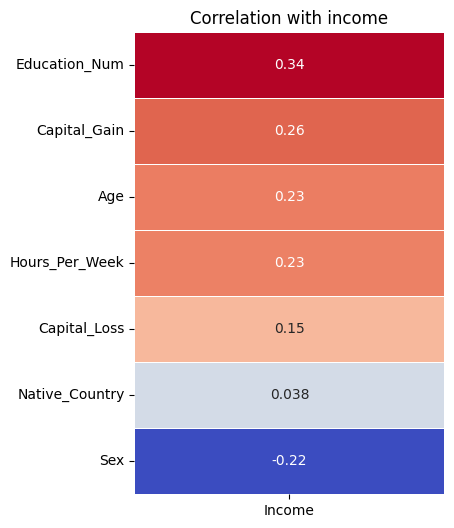

In [48]:
correlations = clean_df.select_dtypes(include="number").corr()
correlations_frame = correlations['Income'].drop("Income").to_frame().sort_values(by="Income",ascending=False)

plt.figure(figsize=(4, 6))  
sns.heatmap(correlations_frame, annot=True, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Correlation with income')
plt.show()

So let's check our clean_df again

In [49]:
clean_df.isna().sum().sum()

np.int64(0)

In [50]:
clean_df.duplicated().sum().sum()

np.int64(9602)

#### Handling Duplicates After Frequency Encoding and Outlier clip
After applying frequency encoding, the number of categories in certain columns decreased. This led to Pandas identifying more than 9000 rows as duplicates, even though they are not actual duplicates. The reduction in the variety of categories made it appear as if there were many identical rows.

These rows are not true duplicates. They are unique in terms of other features like age, education level, work hours, etc. The increased number of "duplicates" is solely due to the simplification of categories.

In summary, the increase in detected duplicates is a side effect of frequency encoding and does not represent actual duplication of clean_df.

In [51]:
clean_df[clean_df.duplicated() == True]

,Age,Workclass,Education_Num,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
181,43,Private,10,Not-In-Family,White,1,0,0,40,0.913883,0
243,20,Private,10,Own-Child,White,0,0,0,20,0.913883,0
331,26,Private,13,Not-In-Family,White,0,0,0,40,0.913883,0
352,33,Private,13,Married,White,0,0,0,40,0.913883,1
373,45,Private,9,Married,Black,0,0,0,40,0.913883,0
...,...,...,...,...,...,...,...,...,...,...,...
32554,53,Private,14,Married,White,0,0,0,40,0.913883,1
32555,22,Private,10,Not-In-Family,White,0,0,0,40,0.913883,0
32557,40,Private,9,Married,White,0,0,0,40,0.913883,1
32558,58,Private,9,Unmarried,White,1,0,0,40,0.913883,0


# Step 3. Preprocessing

Preprocessing steps.
* One Hot Encoding(get_dummies)
* Train Test Split 
* Robust Scaler
* SMOTEENN(For impalanced target)

In [52]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

### One Hot Encoding
Every category in object type became a new columns

In [53]:
cat_columns = clean_df.select_dtypes(include="object")
cat_columns.head()

,Workclass,Relationship,Race
0,Government,Not-In-Family,White
1,Self-Emp-Inc,Married,White
2,Private,Not-In-Family,White
3,Private,Married,Black
4,Private,Married,Black


In [54]:
cat_columns = pd.get_dummies(cat_columns,drop_first=True)
cat_columns.head()

,Workclass_Other,Workclass_Private,Workclass_Self-Emp-Inc,Relationship_Not-In-Family,Relationship_Other-Relative,Relationship_Own-Child,Relationship_Unmarried,Race_Other,Race_White
0,False,False,False,True,False,False,False,False,True
1,False,False,True,False,False,False,False,False,True
2,False,True,False,True,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False


In [55]:
clean_df.drop(clean_df.select_dtypes(include="object"),axis=1,inplace=True)
clean_df.head()

,Age,Education_Num,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,13,0,2174,0,40,0.913883,0
1,50,13,0,0,0,13,0.913883,0
2,38,9,0,0,0,40,0.913883,0
3,53,7,0,0,0,40,0.913883,0
4,28,13,1,0,0,40,0.002920,0


From 11 columns to 17. Thats normal because we have 32k row

In [56]:
clean_df = pd.concat([cat_columns,clean_df],axis=1)

print(clean_df.shape)
clean_df.head()

(32537, 17)


,Workclass_Other,Workclass_Private,Workclass_Self-Emp-Inc,Relationship_Not-In-Family,Relationship_Other-Relative,Relationship_Own-Child,Relationship_Unmarried,Race_Other,Race_White,Age,Education_Num,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,False,False,False,True,False,False,False,False,True,39,13,0,2174,0,40,0.913883,0
1,False,False,True,False,False,False,False,False,True,50,13,0,0,0,13,0.913883,0
2,False,True,False,True,False,False,False,False,True,38,9,0,0,0,40,0.913883,0
3,False,True,False,False,False,False,False,False,False,53,7,0,0,0,40,0.913883,0
4,False,True,False,False,False,False,False,False,False,28,13,1,0,0,40,0.002920,0


### Train test split

In [57]:
x = clean_df.drop("Income",axis=1)
y = clean_df["Income"]

In [58]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(f"X train row count: {x_train.shape[0]}",f"X test row count: {x_test.shape[0]}",sep="\n")

X train row count: 26029
X test row count: 6508


Let's check data leak(when data from x_train in x_test)

In [59]:
intersection_indices = x_train.index.intersection(x_test.index)

if not intersection_indices.empty:
    print(f'Number of overlapping indices: {len(intersection_indices)}\n {intersection_indices}')
else:
    print('No overlapping indices found between x_train and x_test.')

No overlapping indices found between x_train and x_test.


### SMOTEENN
Given the imbalance in our target variable, we have several techniques to address this issue:

* OverSampling: This technique involves creating synthetic samples of the minority class to balance the dataset. While it mitigates class imbalance, it can lead to overfitting because it repeats existing data points with minor variations.
* UnderSampling: This method reduces the number of majority class instances to balance the dataset. However, it may discard potentially valuable data, leading to underfitting of the model.
* SMOTEENN (Synthetic Minority Over-sampling Technique and Edited Nearest Neighbors): This approach combines the advantages of oversampling and undersampling. 

In [60]:
smoteenn = SMOTEENN(random_state=42)
x_train_smoteenn,y_train_smoteenn =  smoteenn.fit_resample(x_train,y_train)

print(f"SMOTEENN  {y_train_smoteenn.value_counts()}",
      f"\n\nOriginal version {y_train.value_counts()}")

SMOTEENN  Income
1    13624
0    13396
Name: count, dtype: int64 

Original version Income
0    19793
1     6236
Name: count, dtype: int64


### Robust scaler

In [61]:
rs = RobustScaler()
x_train_rs = rs.fit_transform(x_train)
x_test_rs = rs.transform(x_test)

# Step 4. ML

Our target is binary(1 = more than 50 000 in year, 0 = less than 50 000 in year), so we will use `Classification` models, such as:
1. Random Forest
2. KNN
3. Logistic Regression
4. XGBoosting
5. LigthBossting

Also, BayesSearch for better optimization

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix,classification_report

from skopt.space import  Integer,Real,Categorical
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

I create a function for clean code

In [63]:
def model_fit(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    return y_train_pred,y_test_pred

In [64]:
def model_accuracy(model,y_train,y_test, y_train_pred,y_test_pred):
    # confusion_train = confusion_matrix(y_train, y_train_pred)
    confusion_test = confusion_matrix(y_test, y_test_pred)

    classification_train = classification_report(y_train, y_train_pred)
    classification_test = classification_report(y_test, y_test_pred)

    best_params = getattr(model, 'best_params_', 'Not available')

    print(f"""\nBest parameters - {best_params}
            \nClassification Report (Train): \n{classification_train}
            
            \nClassification Report (Test): \n{classification_test}
            \nConfusion Matrix (Test):  \n{confusion_test}""")

## RANDOM FOREST 

In [65]:
rf_bs = BayesSearchCV(RandomForestClassifier(),
                       {"n_estimators": Integer(80,160, prior='log-uniform'), 
                        'max_depth':Integer(3,15, prior='log-uniform'),
                        'max_features':Integer(3,9, prior='log-uniform'),
                        'criterion':Categorical(['gini', 'entropy', 'log_loss'])},
                        n_jobs=-1,
                        random_state=42,
                        n_iter=5,
                        cv=5)

y_train_pred, y_test_pred =  model_fit(rf_bs,x_train_smoteenn,y_train_smoteenn,x_test)

We can see a little overfitting, 95% in train accuracy and 80% in test accuracy.\
In normal accuracy between test and train should be 5%, but there 15%. \
So let check accuracy witouth `SMOTEENN`

In [66]:
model_accuracy(rf_bs,y_train_smoteenn, y_test,y_train_pred,y_test_pred)


Best parameters - OrderedDict({'criterion': 'entropy', 'max_depth': 13, 'max_features': 3, 'n_estimators': 108})
            
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13396
           1       0.95      0.95      0.95     13624

    accuracy                           0.95     27020
   macro avg       0.95      0.95      0.95     27020
weighted avg       0.95      0.95      0.95     27020

            
            
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4905
           1       0.57      0.82      0.67      1603

    accuracy                           0.80      6508
   macro avg       0.75      0.81      0.76      6508
weighted avg       0.84      0.80      0.81      6508

            
Confusion Matrix (Test):  
[[3897 1008]
 [ 292 1311]]


Witouth SMOTEEN:\
Test accuracy is 87%\
Train accuracy is 86%.\
So there are no overfitting\
SMOTEEN is dublicated `more than 50k` in many time, so model see one data 2 or 3 time and memorizes it, but original data don't have duplicated

In [67]:
y_train_pred, y_test_pred=  model_fit(rf_bs,x_train,y_train,x_test)
model_accuracy(rf_bs,y_train, y_test,y_train_pred,y_test_pred)


Best parameters - OrderedDict({'criterion': 'entropy', 'max_depth': 13, 'max_features': 3, 'n_estimators': 108})
            
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     19793
           1       0.84      0.55      0.67      6236

    accuracy                           0.87     26029
   macro avg       0.86      0.76      0.79     26029
weighted avg       0.87      0.87      0.86     26029

            
            
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4905
           1       0.83      0.54      0.65      1603

    accuracy                           0.86      6508
   macro avg       0.85      0.75      0.78      6508
weighted avg       0.86      0.86      0.85      6508

            
Confusion Matrix (Test):  
[[4723  182]
 [ 737  866]]


Train - 87%\
Test - 86%\
Recal worse in robust scaled version

In [68]:
y_train_pred, y_test_pred =  model_fit(rf_bs,x_train_rs,y_train,x_test_rs)
model_accuracy(rf_bs,y_train, y_test,y_train_pred,y_test_pred)


Best parameters - OrderedDict({'criterion': 'log_loss', 'max_depth': 12, 'max_features': 4, 'n_estimators': 155})
            
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     19793
           1       0.83      0.55      0.66      6236

    accuracy                           0.87     26029
   macro avg       0.85      0.76      0.79     26029
weighted avg       0.86      0.87      0.86     26029

            
            
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4905
           1       0.82      0.54      0.65      1603

    accuracy                           0.86      6508
   macro avg       0.84      0.75      0.78      6508
weighted avg       0.85      0.86      0.85      6508

            
Confusion Matrix (Test):  
[[4716  189]
 [ 731  872]]


## KNN

In [69]:
rf_bs = BayesSearchCV(KNeighborsClassifier(),
                       {"n_neighbors": Integer(3,13, prior='log-uniform'), 
                        'weights':Categorical(['uniform', 'distance']),
                        "algorithm":Categorical(['auto', 'ball_tree', 'kd_tree', 'brute'])},
                        n_jobs=-1,
                        random_state=42,
                        n_iter=6,
                        cv=6)

y_train_pred, y_test_pred =  model_fit(rf_bs,x_train,y_train,x_test)

Train - 86%\
Test - 84%\
Slightly worse than Random Forest withoth SMOTEENN, but good result

In [70]:
model_accuracy(rf_bs,y_train, y_test,y_train_pred,y_test_pred)


Best parameters - OrderedDict({'algorithm': 'kd_tree', 'n_neighbors': 12, 'weights': 'uniform'})
            
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     19793
           1       0.79      0.59      0.67      6236

    accuracy                           0.86     26029
   macro avg       0.83      0.77      0.79     26029
weighted avg       0.86      0.86      0.86     26029

            
            
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4905
           1       0.75      0.54      0.63      1603

    accuracy                           0.84      6508
   macro avg       0.81      0.74      0.76      6508
weighted avg       0.84      0.84      0.83      6508

            
Confusion Matrix (Test):  
[[4620  285]
 [ 736  867]]


## LogisticRegression

In [71]:
rf_bs = BayesSearchCV(LogisticRegression(),
                       {"C": Integer(2,13, prior='log-uniform'), 
                        'penalty':Categorical(['l2']),},
                        n_jobs=-1,
                        random_state=42,
                        n_iter=6,
                        cv=6)

y_train_pred, y_test_pred = model_fit(rf_bs,x_train,y_train,x_test)

Train - 83%\
Test - 83%\
Worse than KNN

In [72]:
model_accuracy(rf_bs,y_train, y_test,y_train_pred,y_test_pred)


Best parameters - OrderedDict({'C': 5, 'penalty': 'l2'})
            
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     19793
           1       0.70      0.53      0.60      6236

    accuracy                           0.83     26029
   macro avg       0.78      0.73      0.75     26029
weighted avg       0.82      0.83      0.82     26029

            
            
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4905
           1       0.71      0.55      0.62      1603

    accuracy                           0.83      6508
   macro avg       0.79      0.74      0.76      6508
weighted avg       0.83      0.83      0.83      6508

            
Confusion Matrix (Test):  
[[4550  355]
 [ 719  884]]


# XGBoost

In [73]:
xgboot_bs = BayesSearchCV(XGBClassifier(),
                       {"etu": Real(0.1,0.5, prior='log-uniform'), 
                        'n_estimators':Integer(80,150,prior='log-uniform'),                        
                        "max_depth":Integer(1,5,prior='log-uniform')},
                        n_jobs=-1,
                        random_state=42,
                        n_iter=6,
                        cv=6)
y_train_pred, y_test_pred =  model_fit(xgboot_bs,x_train,y_train,x_test)

Train - 87%\
Test - 87%

In [74]:
model_accuracy(xgboot_bs,y_train,y_test,y_train_pred,y_test_pred)


Best parameters - OrderedDict({'etu': 0.1934863651035451, 'max_depth': 3, 'n_estimators': 144})
            
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     19793
           1       0.80      0.62      0.70      6236

    accuracy                           0.87     26029
   macro avg       0.84      0.79      0.81     26029
weighted avg       0.87      0.87      0.87     26029

            
            
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4905
           1       0.80      0.62      0.70      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508

            
Confusion Matrix (Test):  
[[4651  254]
 [ 603 1000]]


# LGBM

In [75]:
light_bs = BayesSearchCV(LGBMClassifier(),
                       {"learning_rate": Real(0.1,0.5, prior='log-uniform'), 
                        'n_estimators':Integer(80,150,prior='log-uniform'),                        
                        "max_depth":Integer(1,5,prior='log-uniform')},
                        n_jobs=-1,
                        random_state=42,
                        n_iter=6,
                        cv=6)
y_train_pred, y_test_pred =  model_fit(xgboot_bs,x_train,y_train,x_test)

Train - 87%\
Test - 87%

In [76]:
model_accuracy(light_bs,y_train,y_test,y_train_pred,y_test_pred)


Best parameters - Not available
            
Classification Report (Train): 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     19793
           1       0.80      0.62      0.70      6236

    accuracy                           0.87     26029
   macro avg       0.84      0.79      0.81     26029
weighted avg       0.87      0.87      0.87     26029

            
            
Classification Report (Test): 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4905
           1       0.80      0.62      0.70      1603

    accuracy                           0.87      6508
   macro avg       0.84      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508

            
Confusion Matrix (Test):  
[[4651  254]
 [ 603 1000]]


## RESULT
Highest was `Random forest` with SMOTEEN (95%), but it was overfit,because test prediction accuracy is 80% \
Normal highest is  XGBoost and LGBMClassifier with 87% and 87% accuracy

I create new column `Capital Net`(Capital Gain - Capital Loss), but train and test score was lower, so i delete this column 

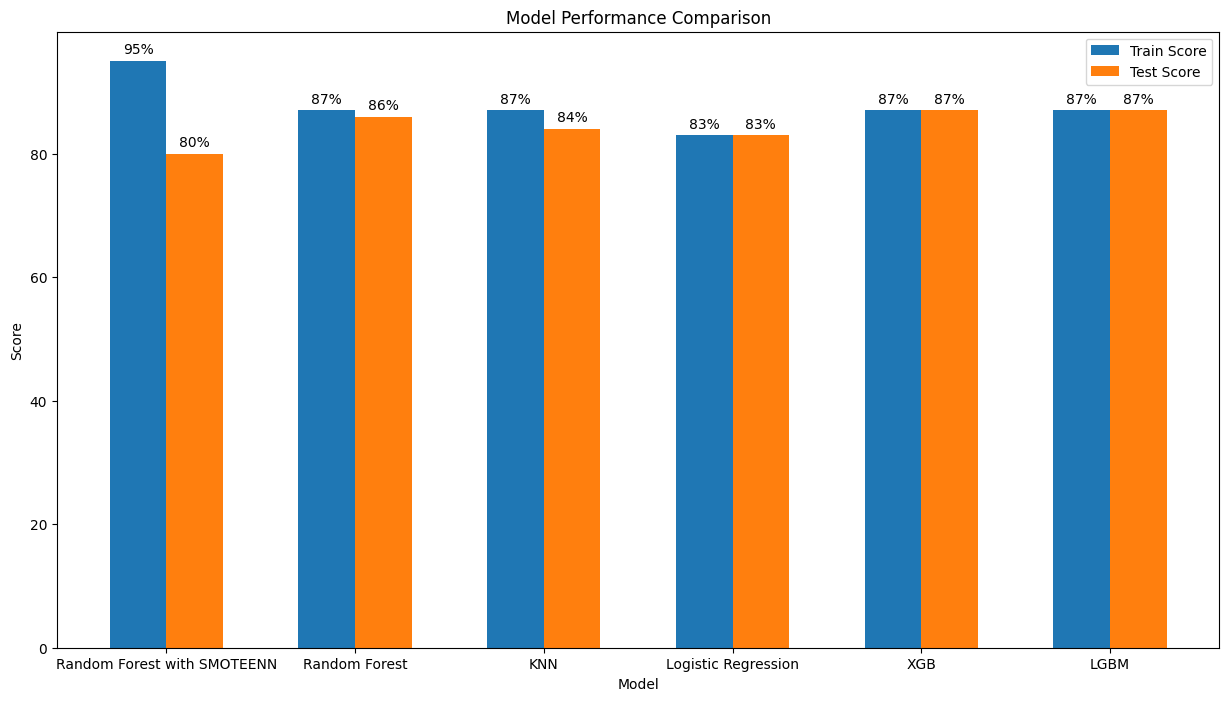

In [77]:
model = ["Random Forest with SMOTEENN","Random Forest","KNN","Logistic Regression","XGB","LGBM"]
train_score = [95,87,87,83,87,87]
test_score  = [80,86,84,83,87,87]

x = np.arange(len(model))
width = 0.3

fig, ax = plt.subplots(figsize=(15, 8))

bars1 = ax.bar(x - width/2, train_score, width, label='Train Score')
bars2 = ax.bar(x + width/2, test_score, width, label='Test Score')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')

ax.set_xticks(x)
ax.set_xticklabels(model)

ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()

        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center',
                    va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.show()